In [1]:
from __future__ import print_function

import mixed_models

import os
import sys
sys.path.insert(0, os.path.abspath("../.."))

import numpy
import pandas
import geopandas
from shapely import wkb, wkt

from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import pytz

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText

R[write to console]: Loading required package: Matrix



In [2]:
# For Both Cases and Growth we use the same ROLLING_WINDOW 
ROLLING_WINDOW = 14
lag_growthCases = 19
lag_growthCasesStd = 4 

lag_Feature = numpy.arange(lag_growthCases-lag_growthCasesStd, lag_growthCases+lag_growthCasesStd+1, 1)
print('lag_Feature', lag_Feature)

#dt_cutoff_training_COVID = datetime(2020,5,31, tzinfo=pytz.utc)
dt_cutoff_training_COVID = datetime(2020,7,25, tzinfo=pytz.utc)
print('Training only with COVID growth data until ', dt_cutoff_training_COVID)
dt_cutoff_training_mobility = dt_cutoff_training_COVID - timedelta(days=lag_growthCases - lag_growthCasesStd)
print('Training only with Mobility data until     ', dt_cutoff_training_mobility)
dt_cutoff_min = datetime(2020, 3, 1, tzinfo=pytz.utc)
print('Considering data from                      ', dt_cutoff_min)
dt_cutoff_latest = datetime(2020,8,2, tzinfo=pytz.utc)
print('Plotting data up to                        ', dt_cutoff_latest)

data_subdirectory = 'data/csv/run011FullTrainingJHU'
if not os.path.exists(data_subdirectory):
    os.makedirs(data_subdirectory)
print('data_subdirectory                          ', data_subdirectory)

lag_Feature [15 16 17 18 19 20 21 22 23]
Training only with COVID growth data until  2020-07-25 00:00:00+00:00
Training only with Mobility data until      2020-07-10 00:00:00+00:00
Considering data from                       2020-03-01 00:00:00+00:00
Plotting data up to                         2020-08-02 00:00:00+00:00
data_subdirectory                           data/csv/run011FullTrainingJHU


In [3]:
# Get the region data (county ids, names, and polygons)
df_region = pandas.read_csv(os.path.join(data_subdirectory, 'df_region.csv'))
df_region['poly'] = df_region['poly'].apply(lambda x: wkb.loads(x, hex=True))
df_region = geopandas.GeoDataFrame(df_region, geometry='poly')

df_region.tail()

,pairs_id,name,County,State,poly
3136,53137,Wyoming.Niobrara,Niobrara,Wyoming,"POLYGON ((-104.05916 43.47913, -104.05620 43.0..."
3137,53138,Wyoming.Converse,Converse,Wyoming,"POLYGON ((-104.90069 42.61193, -105.28875 42.6..."
3138,53139,Wyoming.Goshen,Goshen,Wyoming,"POLYGON ((-104.05351 41.99982, -104.05362 41.6..."
3139,53140,Wyoming.Platte,Platte,Wyoming,"POLYGON ((-104.65064 41.65637, -105.28110 41.6..."
3140,53141,Wyoming.Laramie,Laramie,Wyoming,"POLYGON ((-104.05550 41.56422, -104.05401 41.3..."


In [4]:
# Get the population density data
df_pop_density = pandas.read_csv(os.path.join(data_subdirectory, 'df_pop_density.csv'))
df_pop_density.tail()

,pairs_id,population_density
3135,53137,0.346710
3136,53138,1.254922
3137,53139,2.286790
3138,53140,1.519373
3139,53141,14.217309


In [5]:
# Read from disk
df_AgeRatio = pandas.read_csv(os.path.join(data_subdirectory, 'df_AgeRatio.csv'))

df_AgeRatio.tail()

,pairs_id,AgeRatio,LogAgeRatio
3135,53137,1.466165,0.382650
3136,53138,1.474648,0.388419
3137,53139,1.263804,0.234126
3138,53140,1.867769,0.624744
3139,53141,0.951245,-0.049983


In [6]:
"""
# Get the population data
df_population = pandas.read_csv(os.path.join(data_subdirectory, 'df_population.csv'))
df_population.tail()

# Get processed GrowthCases DataFrame
df_GrowthCases = pandas.read_csv(os.path.join(data_subdirectory, 'df_GrowthCases.csv'), index_col='timestamp')
df_GrowthCases.index = pandas.to_datetime(df_GrowthCases.index)
df_GrowthCases.columns = df_GrowthCases.columns.astype(int)
df_GrowthCases.columns.name = 'pairs_id'
df_GrowthCases.tail()

# Get processed CasesCapita DataFrame
df_CasesCapita = pandas.read_csv(os.path.join(data_subdirectory, 'df_CasesCapita.csv'), index_col='timestamp')
df_CasesCapita.index = pandas.to_datetime(df_CasesCapita.index)
df_CasesCapita.columns = df_CasesCapita.columns.astype(int)
df_CasesCapita.columns.name = 'pairs_id'
df_CasesCapita.tail()

# Get processed LogMobility DataFrame
df_LogMobility = pandas.read_csv(os.path.join(data_subdirectory, 'df_LogMobility.csv'), index_col='timestamp')
df_LogMobility.index = pandas.to_datetime(df_LogMobility.index)
df_LogMobility.columns = df_LogMobility.columns.astype(int)
df_LogMobility.columns.name = 'pairs_id'
df_LogMobility.tail()

# Get processed Diffusion DataFrame
df_Diffusion = pandas.read_csv(os.path.join(data_subdirectory, 'df_Diffusion.csv'), index_col='timestamp')
df_Diffusion.index = pandas.to_datetime(df_Diffusion.index)
df_Diffusion.columns = df_Diffusion.columns.astype(int)
df_Diffusion.columns.name = 'pairs_id'
df_Diffusion.tail()
"""

"\n# Get the population data\ndf_population = pandas.read_csv(os.path.join(data_subdirectory, 'df_population.csv'))\ndf_population.tail()\n\n# Get processed GrowthCases DataFrame\ndf_GrowthCases = pandas.read_csv(os.path.join(data_subdirectory, 'df_GrowthCases.csv'), index_col='timestamp')\ndf_GrowthCases.index = pandas.to_datetime(df_GrowthCases.index)\ndf_GrowthCases.columns = df_GrowthCases.columns.astype(int)\ndf_GrowthCases.columns.name = 'pairs_id'\ndf_GrowthCases.tail()\n\n# Get processed CasesCapita DataFrame\ndf_CasesCapita = pandas.read_csv(os.path.join(data_subdirectory, 'df_CasesCapita.csv'), index_col='timestamp')\ndf_CasesCapita.index = pandas.to_datetime(df_CasesCapita.index)\ndf_CasesCapita.columns = df_CasesCapita.columns.astype(int)\ndf_CasesCapita.columns.name = 'pairs_id'\ndf_CasesCapita.tail()\n\n# Get processed LogMobility DataFrame\ndf_LogMobility = pandas.read_csv(os.path.join(data_subdirectory, 'df_LogMobility.csv'), index_col='timestamp')\ndf_LogMobility.index

In [7]:
# Get processed LogCases DataFrame
df_LogCases = pandas.read_csv(os.path.join(data_subdirectory, 'df_LogCases.csv'), index_col='timestamp')
df_LogCases.index = pandas.to_datetime(df_LogCases.index)
df_LogCases.columns = df_LogCases.columns.astype(int)
df_LogCases.columns.name = 'pairs_id'
df_LogCases.tail()

pairs_id,50001,50002,50003,50004,50005,50006,50007,50008,50009,50010,...,53132,53133,53134,53135,53136,53137,53138,53139,53140,53141
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-29 00:00:00+00:00,NaN,3.287400,4.717454,3.279579,2.247524,3.727344,2.473464,2.320719,1.698845,2.590759,...,0.449398,0.779226,0.520930,0.666531,1.700903,NaN,-2.071996,-1.922198,-3.044522,1.761523
2020-07-30 00:00:00+00:00,NaN,3.283317,4.687001,3.291714,2.271558,3.705322,2.465938,2.306850,1.738817,2.611308,...,0.391474,0.878247,0.619951,0.745003,1.779375,NaN,-2.121507,-1.922198,-3.044522,1.851006
2020-07-31 00:00:00+00:00,NaN,3.212574,4.628916,3.203374,2.251572,3.638586,2.489394,2.211493,1.730404,2.708316,...,0.480957,0.878247,0.718972,0.745003,1.758826,NaN,-2.171017,-1.922198,-3.044522,1.841468
2020-08-01 00:00:00+00:00,NaN,3.203037,4.615691,3.198081,2.231585,3.637016,2.549916,2.149708,1.730404,2.757827,...,0.546407,0.878247,0.797444,0.666531,1.651392,NaN,-2.249490,-1.849941,-3.044522,1.854491
2020-08-02 00:00:00+00:00,NaN,3.134364,4.609151,3.174616,2.198014,3.577135,2.605143,2.106412,1.680894,2.776567,...,0.674389,0.878247,0.858786,0.602539,1.613614,NaN,-2.327962,-1.777683,-3.044522,1.886055


In [8]:
# Get processed Mobility DataFrame
df_Mobility = pandas.read_csv(os.path.join(data_subdirectory, 'df_Mobility.csv'), index_col='timestamp')
df_Mobility.index = pandas.to_datetime(df_Mobility.index)
df_Mobility.columns = df_Mobility.columns.astype(int)
df_Mobility.columns.name = 'pairs_id'
df_Mobility.tail()

pairs_id,50001,50002,50003,50004,50005,50006,50007,50008,50009,50010,...,53132,53133,53134,53135,53136,53137,53138,53139,53140,53141
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-29 00:00:00+00:00,8.874857,10.466500,7.389429,7.701857,14.377643,8.945214,10.908143,11.178786,10.404857,9.866929,...,9.709929,4.135357,57.702357,3.952214,4.511000,NaN,5.277500,2.709357,6.745929,4.533429
2020-07-30 00:00:00+00:00,8.841857,10.357143,7.313143,7.705500,14.482286,8.899286,10.864929,11.097286,10.193214,9.863214,...,9.604357,4.121857,57.437571,3.930643,4.487286,NaN,5.183929,2.617429,6.824571,4.525857
2020-07-31 00:00:00+00:00,8.788071,10.405357,7.236071,7.711143,14.571500,8.739286,11.043286,11.187500,10.159000,9.875286,...,9.637643,4.136357,58.462429,4.010429,4.500286,NaN,5.370500,2.443357,6.890286,4.534786
2020-08-01 00:00:00+00:00,8.773714,10.348571,7.204714,7.683143,14.604857,8.705643,11.101000,11.269357,10.078357,9.747071,...,9.452214,4.124500,56.027500,4.080357,4.476429,NaN,4.743786,2.363071,6.844000,4.529071
2020-08-02 00:00:00+00:00,8.720500,10.299571,7.151643,7.718143,14.677714,8.704143,11.017357,11.192357,10.200357,9.653000,...,9.158929,4.060143,55.206000,4.094429,4.394571,NaN,4.664929,2.315000,6.555857,4.467929


In [9]:
# Get processed and joined DataFrame
df_joined = pandas.read_csv(os.path.join(data_subdirectory, 'df_joined.csv'), header=[0,1], index_col=0)
df_joined.index = pandas.to_datetime(df_joined.index)
# Change type of pairs_id in multiindex column to integer by transposing twice
df_joined = df_joined.T.reset_index()
df_joined['pairs_id'] = df_joined['pairs_id'].astype(int)
df_joined = df_joined.set_index(['level_0', 'pairs_id']).T
df_joined.columns.names = [None, 'pairs_id']
# Need to make it datetime index again  dtype='datetime64[ns, UTC]'
df_joined.index = df_joined.reset_index()['timestamp']
df_joined

Mobility                                            \
pairs_id                      50001      50002     50003     50004      50005   
timestamp                                                                       
2020-03-01 00:00:00+00:00  7.224000   9.717000  7.623000  7.120000  11.711000   
2020-03-02 00:00:00+00:00  8.231000  12.095000  8.757500  7.632000  15.214000   
2020-03-03 00:00:00+00:00  8.759000  12.958333  9.251667  8.020667  16.165000   
2020-03-04 00:00:00+00:00  9.037750  13.501500  9.522500  8.125750  16.811000   
2020-03-05 00:00:00+00:00  9.338000  13.985200  9.793600  8.313200  17.352600   
...                             ...        ...       ...       ...        ...   
2020-07-29 00:00:00+00:00  8.874857  10.466500  7.389429  7.701857  14.377643   
2020-07-30 00:00:00+00:00  8.841857  10.357143  7.313143  7.705500  14.482286   
2020-07-31 00:00:00+00:00  8.788071  10.405357  7.236071  7.711143  14.571500   
2020-08-01 00:00:00+00:00  8.773714  10.348571  7.204714  7.683143  14.604857   
2020-08-02 00:00:00+00:00  8.720500  10.299571  7.151643  7.718143  14.677714   

                                                                      \
pairs_id                      50006      50007      50008      50009   
timestamp                                                              
2020-03-01 00:00:00+00:00  7.503000   7.907000   8.907000   9.964000   
2020-03-02 00:00:00+00:00  8.702500  10.145500  11.215500  11.238500   
2020-03-03 00:00:00+00:00  9.419333  11.341667  11.669667  11.665000   
2020-03-04 00:00:00+00:00  9.662500  11.864500  11.567500  11.526750   
2020-03-05 00:00:00+00:00  9.899000  12.099800  11.932200  11.651000   
...                             ...        ...        ...        ...   
2020-07-29 00:00:00+00:00  8.945214  10.908143  11.178786  10.404857   
2020-07-30 00:00:00+00:00  8.899286  10.864929  11.097286  10.193214   
2020-07-31 00:00:00+00:00  8.739286  11.043286  11.187500  10.159000   
2020-08-01 00:00:00+00:00  8.705643  11.101000  11.269357  10.078357   
2020-08-02 00:00:00+00:00  8.704143  11.017357  11.192357  10.200357   

                                     ... MaxMobility                       \
pairs_id                      50010  ...       53132     53133      53134   
timestamp                            ...                                    
2020-03-01 00:00:00+00:00  7.012000  ...   12.504929  4.916071  71.578571   
2020-03-02 00:00:00+00:00  8.254500  ...   12.504929  4.916071  71.578571   
2020-03-03 00:00:00+00:00  8.739667  ...   12.504929  4.916071  71.578571   
2020-03-04 00:00:00+00:00  9.108250  ...   12.504929  4.916071  71.578571   
2020-03-05 00:00:00+00:00  9.186000  ...   12.504929  4.916071  71.578571   
...                             ...  ...         ...       ...        ...   
2020-07-29 00:00:00+00:00  9.866929  ...   12.504929  4.916071  71.578571   
2020-07-30 00:00:00+00:00  9.863214  ...   12.504929  4.916071  71.578571   
2020-07-31 00:00:00+00:00  9.875286  ...   12.504929  4.916071  71.578571   
2020-08-01 00:00:00+00:00  9.747071  ...   12.504929  4.916071  71.578571   
2020-08-02 00:00:00+00:00  9.653000  ...   12.504929  4.916071  71.578571   

                                                                       \
pairs_id                    53135     53136 53137     53138     53139   
timestamp                                                               
2020-03-01 00:00:00+00:00  4.7655  5.909786   NaN  7.725833  4.243571   
2020-03-02 00:00:00+00:00  4.7655  5.909786   NaN  7.725833  4.243571   
2020-03-03 00:00:00+00:00  4.7655  5.909786   NaN  7.725833  4.243571   
2020-03-04 00:00:00+00:00  4.7655  5.909786   NaN  7.725833  4.243571   
2020-03-05 00:00:00+00:00  4.7655  5.909786   NaN  7.725833  4.243571   
...                           ...       ...   ...       ...       ...   
2020-07-29 00:00:00+00:00  4.7655  5.909786   NaN  7.725833  4.243571   
2020-07-30 00:00:00+00:00  4.7655  5.909786   NaN  7.725833  4.243571   
2

In [10]:
def lagged_dataframe(df_joined, lag_growthCases):
    df1 = df_joined['GrowthCases'].shift(periods=-lag_growthCases)
    df1.columns = pandas.MultiIndex.from_product([['subsequent_GrowthCases'], df1.columns])
    df1.columns.names = [None, 'pairs_id']

    df_lagged = pandas.merge(df_joined[['Mobility']], 
                             df_joined[['LogMobility']], left_index=True, right_index=True)
    df_lagged = pandas.merge(df_lagged,
                             df_joined[['CasesCapita']], left_index=True, right_index=True)
    df_lagged = pandas.merge(df_lagged, df1, left_index=True, right_index=True)
    return df_lagged

def filter_lagged_dataframe(df_unfiltered, 
                            filter_cases_capita_min, 
                            filter_growth_cases_zero_transition,
                            filter_mobility_min):
    """
    :df_unfiltered: lagged dataframe (e.g. df_lagged)
    :returns:       filtered dataframe
    """
    df = df_unfiltered.copy()
    
    if filter_cases_capita_min is not None:
        df = df[df['CasesCapita']>=filter_cases_capita_min] 

    # Note we use 1e-10  and -1e-10 instead of 0 to avoid false positives due to floating point rounding errors
    if filter_growth_cases_zero_transition is not None:
        df_negative_transition = ((df_unfiltered['subsequent_GrowthCases']<-1e-10) & 
                                  (df_unfiltered['subsequent_GrowthCases'].shift()>1e-10))
        df_positive_transition = ((df_unfiltered['subsequent_GrowthCases']>1e-10) & 
                                  (df_unfiltered['subsequent_GrowthCases'].shift()<-1e-10))
        df_zero_transition = (df_negative_transition | df_positive_transition)
        df = df[df_zero_transition]

    if filter_mobility_min is not None:
        df = df[df['Mobility']>=filter_mobility_min] # S/N
        
    return df

In [11]:
# Lagged and Filtered DataFrame
# ONLY THE GrowthCases IS SHIFTED

# Filter on the lagged data, not on df_joined
FILTER_CASES_CAPITA_MIN = 2
FILTER_GROWTH_CASES_ZERO_TRANSITION = True
FILTER_MOBILITY_MIN = 0.01

df_lagged = {}
df_lagged_filtered = {}

for this_lag in lag_Feature:
    df_lagged[this_lag] = lagged_dataframe(df_joined, this_lag)

    df_lagged_filtered[this_lag] = filter_lagged_dataframe(df_lagged[this_lag], 
                                                         FILTER_CASES_CAPITA_MIN,
                                                         FILTER_GROWTH_CASES_ZERO_TRANSITION,
                                                         FILTER_MOBILITY_MIN)

    df_lagged[this_lag] = df_lagged[this_lag].swaplevel(axis=1)
    df_lagged_filtered[this_lag] = df_lagged_filtered[this_lag].swaplevel(axis=1)
    
df_lagged_filtered[lag_growthCases]

pairs_id,50001,50002,50003,50004,50005,50006,50007,50008,50009,50010,...,53132,53133,53134,53135,53136,53137,53138,53139,53140,53141
,Mobility,Mobility,Mobility,Mobility,Mobility,Mobility,Mobility,Mobility,Mobility,Mobility,...,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases,subsequent_GrowthCases
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-03-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_critical = pandas.DataFrame()

# Critical mobility
for this_lag in lag_Feature:
    df = df_lagged_filtered[this_lag].swaplevel(axis=1)[['LogMobility']].stack(
        dropna=False).reset_index().rename(columns={'LogMobility': 'LogCriticalMobility'})
    df['lag'] = this_lag
    df_critical = pandas.concat([df_critical, df])
df_critical = df_critical.reset_index(drop=True)

# List of timestamps
dt_list = pandas.date_range(start=df_critical['timestamp'].min(), end=df_critical['timestamp'].max())

# Population density
df_repeated = pandas.concat([df_pop_density.set_index('pairs_id')]*len(dt_list), axis=1)
df_repeated.columns = dt_list
df_repeated = df_repeated.stack().reset_index().rename(columns={'level_1':'timestamp', 0:'population_density'})
df_critical = pandas.merge(df_critical, df_repeated, on=['timestamp', 'pairs_id'], how='outer')
df_critical['LogPopDensity'] = numpy.log(df_critical['population_density'])

# LogAgeRatio (ln(age60-64 / age20-24))
df_repeated = pandas.concat([df_AgeRatio[['pairs_id', 'LogAgeRatio']].set_index('pairs_id')]*len(dt_list), axis=1)
df_repeated.columns = dt_list
df_repeated = df_repeated.stack().reset_index().rename(columns={'level_1':'timestamp', 0:'LogAgeRatio'})
df_critical = pandas.merge(df_critical, df_repeated, on=['timestamp', 'pairs_id'], how='outer')

# Diffusion
df_stacked = df_joined['Diffusion'].stack(dropna=False).reset_index().rename(columns={0: 'Diffusion'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')

# LogCases
df_stacked = df_joined['LogCases'].stack(dropna=False).reset_index().rename(columns={0: 'LogCases'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')
df_critical['Cases'] = numpy.exp(df_critical['LogCases'])

# GrowthCases
df_stacked = df_joined['GrowthCases'].stack(dropna=False).reset_index().rename(columns={0: 'GrowthCases'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')

# CasesCapita and LogCasesCapita
df_stacked = df_joined['CasesCapita'].stack(dropna=False).reset_index().rename(columns={0: 'CasesCapita'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')
df_critical['LogCasesCapita'] = numpy.log(df_critical['CasesCapita'])

# CumCasesCapita and LogCumCasesCapita
df_stacked = df_joined['CumCasesCapita'].stack(dropna=False).reset_index().rename(columns={0: 'CumCasesCapita'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')
df_critical['LogCumCasesCapita'] = numpy.log(df_critical['CumCasesCapita'])

# LogMobility
df_stacked = df_joined['LogMobility'].stack(dropna=False).reset_index().rename(columns={0: 'LogMobility'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')

# Mobility
df_stacked = df_joined['Mobility'].stack(dropna=False).reset_index().rename(columns={0: 'Mobility'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')

# MaxMobility
df_stacked = df_joined['MaxMobility'].stack(dropna=False).reset_index().rename(columns={0: 'MaxMobility'})
df_critical = pandas.merge(df_critical, df_stacked, on=['timestamp', 'pairs_id'], how='outer')
df_critical['LogMaxMobility'] = numpy.log(df_critical['MaxMobility'])

# State and County names
df_critical = pandas.merge(df_region[['State', 'County', 'pairs_id']], df_critical, on='pairs_id', how='right')

# In order to use the date as random effect
df_critical['date'] = df_critical['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Don't use timestamps with too little data for the fit
df_critical = df_critical[df_critical['timestamp']>=datetime(2020,3,25, tzinfo=pytz.utc)].reset_index(drop=True)

df_critical['day'] = df_critical['timestamp'].apply(lambda x: (x-datetime(2020,1,1, tzinfo=pytz.utc)).days)

def days2timedelta(lag):
    """
    helper function much faster than datetime timedelta
    """
    microseconds = numpy.around(numpy.asarray(lag) * (24*60*60*10**6))
    return microseconds.astype('timedelta64[us]')

df_critical['timestamp_covid_training'] = df_critical['timestamp'] + days2timedelta(df_critical['lag'])

df_critical.tail().T

,3697863,3697864,3697865,3697866,3697867
State,South_Dakota,South_Dakota,South_Dakota,South_Dakota,South_Dakota
County,Shannon,Shannon,Shannon,Shannon,Shannon
pairs_id,52409,52409,52409,52409,52409
timestamp,2020-07-29 00:00:00+00:00,2020-07-30 00:00:00+00:00,2020-07-31 00:00:00+00:00,2020-08-01 00:00:00+00:00,2020-08-02 00:00:00+00:00
LogCriticalMobility,NaN,NaN,NaN,NaN,NaN
lag,NaN,NaN,NaN,NaN,NaN
population_density,2.60162,2.60162,2.60162,2.60162,2.60162
LogPopDensity,0.956135,0.956135,0.956135,0.956135,0.956135
LogAgeRatio,-0.689484,-0.689484,-0.689484,-0.689484,-0.689484
Diffusion,NaN,NaN,NaN,NaN,NaN


In [13]:
# Model parameter definition
model_params = {}
model_params['fe_features'] = ['LogPopDensity', 'Diffusion', 'LogCases', 'CumCasesCapita', 'LogAgeRatio', 'day']
model_params['fe_features_for_re_slopes'] = []
model_params['re_features'] = ['date']
model_params['re_terms'] = ['(1|date)']
for fixed_effect in model_params['fe_features_for_re_slopes']:
    model_params['re_terms'].append('(0+'+fixed_effect+'|date)')
model_params

{'fe_features': ['LogPopDensity',
  'Diffusion',
  'LogCases',
  'CumCasesCapita',
  'LogAgeRatio',
  'day'],
 'fe_features_for_re_slopes': [],
 're_features': ['date'],
 're_terms': ['(1|date)']}

In [14]:
# Training - Testing

# Mixed Model to fit population - critical mobility relationship with state random effects
verbose = True

target = 'LogCriticalMobility'

# Dataprep for lmer
training_set = df_critical.copy()
# Only use rows where LogCriticalMobility has been sampled
training_set = training_set.dropna(subset=['LogCriticalMobility']).reset_index(drop=True)
# Mobility timestamp training cutoff
training_set = training_set[training_set['timestamp']<=dt_cutoff_training_mobility].reset_index(drop=True)
# Covid timestamp training cutoff
training_set = training_set[training_set['timestamp_covid_training']<=dt_cutoff_training_COVID].reset_index(drop=True)
# Dummy variable for using mixed_models.py (we are not using 'year' feature)
training_set['year'] = 'dummy'

#print('Training only with COVID growth data until ', dt_cutoff_training_COVID)
print('Training only with COVID growth data until ', training_set['timestamp_covid_training'].max())
#print('Training only with mobility data until     ', dt_cutoff_training_mobility)
print('Training only with mobility data until     ', training_set['timestamp'].max())

del training_set['timestamp']
del training_set['timestamp_covid_training']

# For predicting we just need lag = lag_growthCases
prediction_set = df_critical[df_critical['lag']==lag_growthCases].reset_index(drop=True)
prediction_set['lag'] = numpy.nan
prediction_set['year'] = 'dummy'
s_timestamp = prediction_set['timestamp']
del prediction_set['timestamp']
del prediction_set['timestamp_covid_training']

prediction_set.tail()

Training only with COVID growth data until  2020-07-25 00:00:00+00:00
Training only with mobility data until      2020-07-10 00:00:00+00:00


,State,County,pairs_id,LogCriticalMobility,lag,population_density,LogPopDensity,LogAgeRatio,Diffusion,LogCases,...,LogCasesCapita,CumCasesCapita,LogCumCasesCapita,LogMobility,Mobility,MaxMobility,LogMaxMobility,date,day,year
410811,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.547168,1.761523,...,1.766536,360.907901,5.888623,1.511479,4.533429,4.868714,1.58283,2020-07-29,210,dummy
410812,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.329344,1.851006,...,1.856019,367.306116,5.906196,1.509807,4.525857,4.868714,1.58283,2020-07-30,211,dummy
410813,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.359753,1.841468,...,1.846481,373.643594,5.923302,1.511778,4.534786,4.868714,1.58283,2020-07-31,212,dummy
410814,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.336547,1.854491,...,1.859504,380.064145,5.940340,1.510517,4.529071,4.868714,1.58283,2020-08-01,213,dummy
410815,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.255394,1.886055,...,1.891067,386.690581,5.957625,1.496925,4.467929,4.868714,1.58283,2020-08-02,214,dummy


In [15]:
scaler = StandardScaler()
scaling_columns = model_params['fe_features']
training_set[scaling_columns] = scaler.fit_transform(training_set[scaling_columns])
prediction_set[scaling_columns] = scaler.transform(prediction_set[scaling_columns])

prediction_set.tail()

,State,County,pairs_id,LogCriticalMobility,lag,population_density,LogPopDensity,LogAgeRatio,Diffusion,LogCases,...,LogCasesCapita,CumCasesCapita,LogCumCasesCapita,LogMobility,Mobility,MaxMobility,LogMaxMobility,date,day,year
410811,Wyoming,Laramie,53141,NaN,NaN,14.217309,-0.704889,-0.353013,-0.002207,0.366642,...,1.766536,-0.097119,5.888623,1.511479,4.533429,4.868714,1.58283,2020-07-29,2.441258,dummy
410812,Wyoming,Laramie,53141,NaN,NaN,14.217309,-0.704889,-0.353013,-0.043649,0.431904,...,1.856019,-0.085117,5.906196,1.509807,4.525857,4.868714,1.58283,2020-07-30,2.476161,dummy
410813,Wyoming,Laramie,53141,NaN,NaN,14.217309,-0.704889,-0.353013,-0.037863,0.424948,...,1.846481,-0.073230,5.923302,1.511778,4.534786,4.868714,1.58283,2020-07-31,2.511064,dummy
410814,Wyoming,Laramie,53141,NaN,NaN,14.217309,-0.704889,-0.353013,-0.042278,0.434446,...,1.859504,-0.061186,5.940340,1.510517,4.529071,4.868714,1.58283,2020-08-01,2.545967,dummy
410815,Wyoming,Laramie,53141,NaN,NaN,14.217309,-0.704889,-0.353013,-0.057718,0.457466,...,1.891067,-0.048756,5.957625,1.496925,4.467929,4.868714,1.58283,2020-08-02,2.580870,dummy


In [16]:
for f in model_params['fe_features']:
    assert(f in scaling_columns)

In [17]:
# Instantiate the class instance
lmer1 = mixed_models.lmer(target = target,
                          fixed_effects = model_params['fe_features'],
                          re_features = model_params['re_features'],
                          re_terms = model_params['re_terms']
                         )

lmer1.import_clean_trainSet(training_set)
lmer1.prep_R_training(verbose=verbose)

# Train the model
lmer1.train_lmer(verbose=verbose)

lmer1.predict_lmer(prediction_set)
df_preds = pandas.concat([prediction_set, lmer1.df_preds, s_timestamp], axis=1)

df_preds[scaling_columns] = scaler.inverse_transform(df_preds[scaling_columns])
df_preds.tail()

r_df_train
lm1
cbind(LogCriticalMobility) ~ LogPopDensity + Diffusion + LogCases + CumCasesCapita + LogAgeRatio + day + (1|date)
lm1 <- lmer("cbind(LogCriticalMobility) ~ LogPopDensity + Diffusion + LogCases + CumCasesCapita + LogAgeRatio + day + (1|date)",data=r_df_train)
Linear mixed model fit by REML ['lmerMod']
Formula: cbind(LogCriticalMobility) ~ LogPopDensity + Diffusion + LogCases +  
    CumCasesCapita + LogAgeRatio + day + (1 | date)
   Data: r_df_train
REML criterion at convergence: 135379.4
Random effects:
 Groups   Name        Std.Dev.
 date     (Intercept) 0.2182  
 Residual             0.7618  
Number of obs: 58824, groups:  date, 108
Fixed Effects:
   (Intercept)   LogPopDensity       Diffusion        LogCases  CumCasesCapita  
       1.48231        -0.24849        -0.16116        -0.46723         0.01093  
   LogAgeRatio             day  
       0.02911         0.46775  



,State,County,pairs_id,LogCriticalMobility,lag,population_density,LogPopDensity,LogAgeRatio,Diffusion,LogCases,...,LogCumCasesCapita,LogMobility,Mobility,MaxMobility,LogMaxMobility,date,day,year,preds,timestamp
410811,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.547168,1.761523,...,5.888623,1.511479,4.533429,4.868714,1.58283,2020-07-29,210.0,dummy,2.617082,2020-07-29 00:00:00+00:00
410812,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.329344,1.851006,...,5.906196,1.509807,4.525857,4.868714,1.58283,2020-07-30,211.0,dummy,2.609726,2020-07-30 00:00:00+00:00
410813,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.359753,1.841468,...,5.923302,1.511778,4.534786,4.868714,1.58283,2020-07-31,212.0,dummy,2.628499,2020-07-31 00:00:00+00:00
410814,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.336547,1.854491,...,5.940340,1.510517,4.529071,4.868714,1.58283,2020-08-01,213.0,dummy,2.641231,2020-08-01 00:00:00+00:00
410815,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.255394,1.886055,...,5.957625,1.496925,4.467929,4.868714,1.58283,2020-08-02,214.0,dummy,2.649425,2020-08-02 00:00:00+00:00


In [18]:
# Predictions for dates after the last date with explicit random intercept need to be adjusted
df_date_intercepts = vars(lmer1)['re_params']['date'].reset_index(drop=True)
df_date_intercepts = df_date_intercepts.rename(columns={'(Intercept)': 'date Intercept'})

last_date_with_intercept = df_date_intercepts.sort_values(by='date').iloc[-1][0]
last_intercept = df_date_intercepts.sort_values(by='date').iloc[-1][1]
print(last_date_with_intercept, last_intercept)
df_preds.loc[df_preds['date']>last_date_with_intercept, 'preds'] += last_intercept
df_preds.tail()

2020-07-10 -0.02993688111901269


,State,County,pairs_id,LogCriticalMobility,lag,population_density,LogPopDensity,LogAgeRatio,Diffusion,LogCases,...,LogCumCasesCapita,LogMobility,Mobility,MaxMobility,LogMaxMobility,date,day,year,preds,timestamp
410811,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.547168,1.761523,...,5.888623,1.511479,4.533429,4.868714,1.58283,2020-07-29,210.0,dummy,2.587145,2020-07-29 00:00:00+00:00
410812,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.329344,1.851006,...,5.906196,1.509807,4.525857,4.868714,1.58283,2020-07-30,211.0,dummy,2.579789,2020-07-30 00:00:00+00:00
410813,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.359753,1.841468,...,5.923302,1.511778,4.534786,4.868714,1.58283,2020-07-31,212.0,dummy,2.598562,2020-07-31 00:00:00+00:00
410814,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.336547,1.854491,...,5.940340,1.510517,4.529071,4.868714,1.58283,2020-08-01,213.0,dummy,2.611294,2020-08-01 00:00:00+00:00
410815,Wyoming,Laramie,53141,NaN,NaN,14.217309,2.65446,-0.049983,4.255394,1.886055,...,5.957625,1.496925,4.467929,4.868714,1.58283,2020-08-02,214.0,dummy,2.619488,2020-08-02 00:00:00+00:00


In [19]:
# Normalized Difference Mobility Index

# Modeled Critical Mobility
df_NDMI = df_preds[['date', 'pairs_id', 'preds', 'Cases', 'LogCases', 'CasesCapita', 'Mobility'
               ]].rename(columns={'preds': 'CriticalMobility'})
df_NDMI['CriticalMobility'] = numpy.exp(df_NDMI['CriticalMobility'])

# Normalized Differenc Mobility Index
df_NDMI['NDMI'] = 100 * (
    (df_NDMI['Mobility'] - df_NDMI['CriticalMobility']) / (df_NDMI['Mobility'] + df_NDMI['CriticalMobility']))

df_NDMI = df_NDMI.rename(columns={'pairs_id': 'Region'})

df_NDMI['Timestamp'] = df_NDMI['date'].apply(lambda x: int((datetime.strptime(x, '%Y-%m-%d') -
                                                 datetime(1970,1,1)).total_seconds()))

df_NDMI.tail()

,date,Region,CriticalMobility,Cases,LogCases,CasesCapita,Mobility,NDMI,Timestamp
410811,2020-07-29,53141,13.291775,5.821298,1.761523,5.850551,4.533429,-49.134622,1595980800
410812,2020-07-30,53141,13.194351,6.366223,1.851006,6.398214,4.525857,-48.918691,1596067200
410813,2020-07-31,53141,13.444396,6.305791,1.841468,6.337479,4.534786,-49.555150,1596153600
410814,2020-08-01,53141,13.616655,6.388448,1.854491,6.420551,4.529071,-50.081122,1596240000
410815,2020-08-02,53141,13.728694,6.593304,1.886055,6.626436,4.467929,-50.892772,1596326400


In [20]:
del df_NDMI['Timestamp']
df_NDMI = df_NDMI.set_index(['date', 'Region']).unstack()

In [21]:
# Training RMSE
def simple_rmse(preds, target):
    return numpy.sqrt(numpy.nanmean((preds - target)**2))

df_preds_trainingset = df_preds[df_preds['timestamp']<=dt_cutoff_training_COVID].dropna(
    subset=['preds', 'LogCriticalMobility']).reset_index(drop=True)
df_preds_testset = df_preds[df_preds['timestamp']>dt_cutoff_training_COVID].dropna(
    subset=['preds', 'LogCriticalMobility']).reset_index(drop=True)
print('Training with COVID data until', dt_cutoff_training_COVID)
print('Testing with COVID data from  ', dt_cutoff_training_COVID + timedelta(days=1))

complete_rmse = simple_rmse(df_preds['preds'], df_preds['LogCriticalMobility'])
training_rmse = simple_rmse(df_preds_trainingset['preds'], df_preds_trainingset['LogCriticalMobility'])
testing_rmse = simple_rmse(df_preds_testset['preds'], df_preds_testset['LogCriticalMobility'])
print('Complete RMSE', round(complete_rmse, 3))
print('Training RMSE', round(training_rmse, 3))
print('Testing RMSE ', round(testing_rmse, 3))

Training with COVID data until 2020-07-25 00:00:00+00:00
Testing with COVID data from   2020-07-26 00:00:00+00:00
Complete RMSE 0.742
Training RMSE 0.742
Testing RMSE  nan


/home/ipython/software/python/python37/virtualenvs/pairs-python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# PLOTTING RESULTS BELOW
dt_early = datetime(2020, 3, 26, tzinfo=pytz.utc)
dt_shutdown = datetime(2020, 4, 10, tzinfo=pytz.utc)
dt_reopening = datetime(2020, 6, 7, tzinfo=pytz.utc)

In [23]:
# Exclude Alaska and Hawaii for plotting purposes only
df_region_helper = df_region[df_region['State']!='Alaska']
df_region_helper = df_region_helper[df_region_helper['State']!='Hawaii']

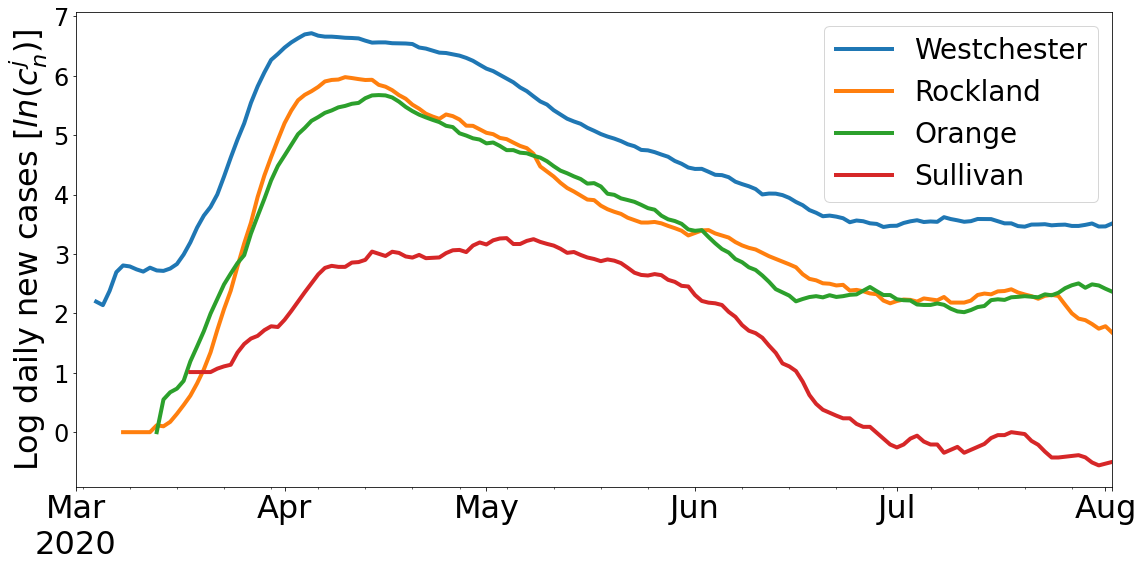

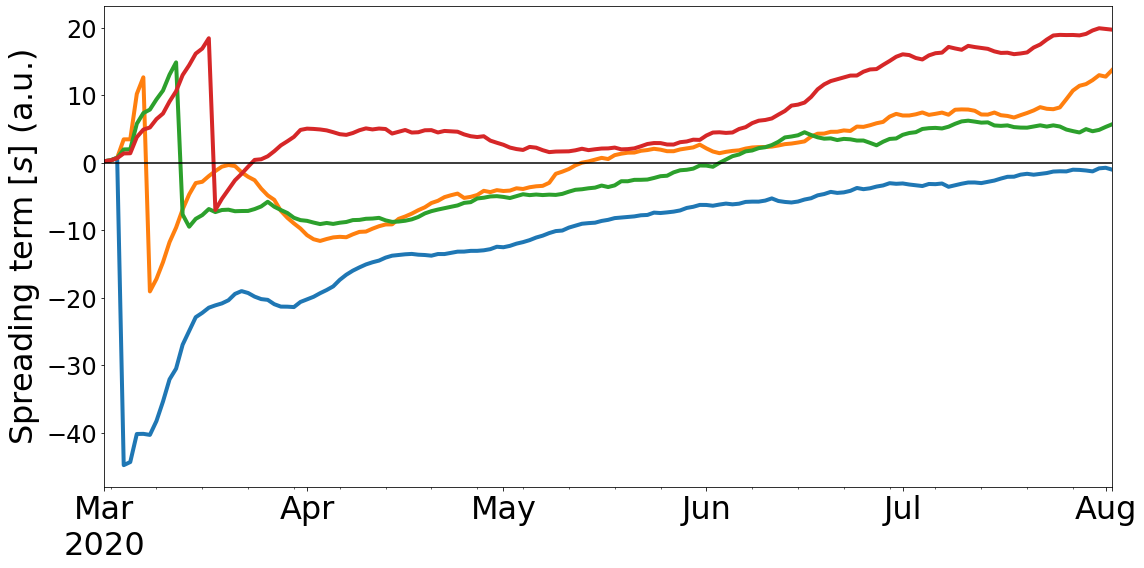

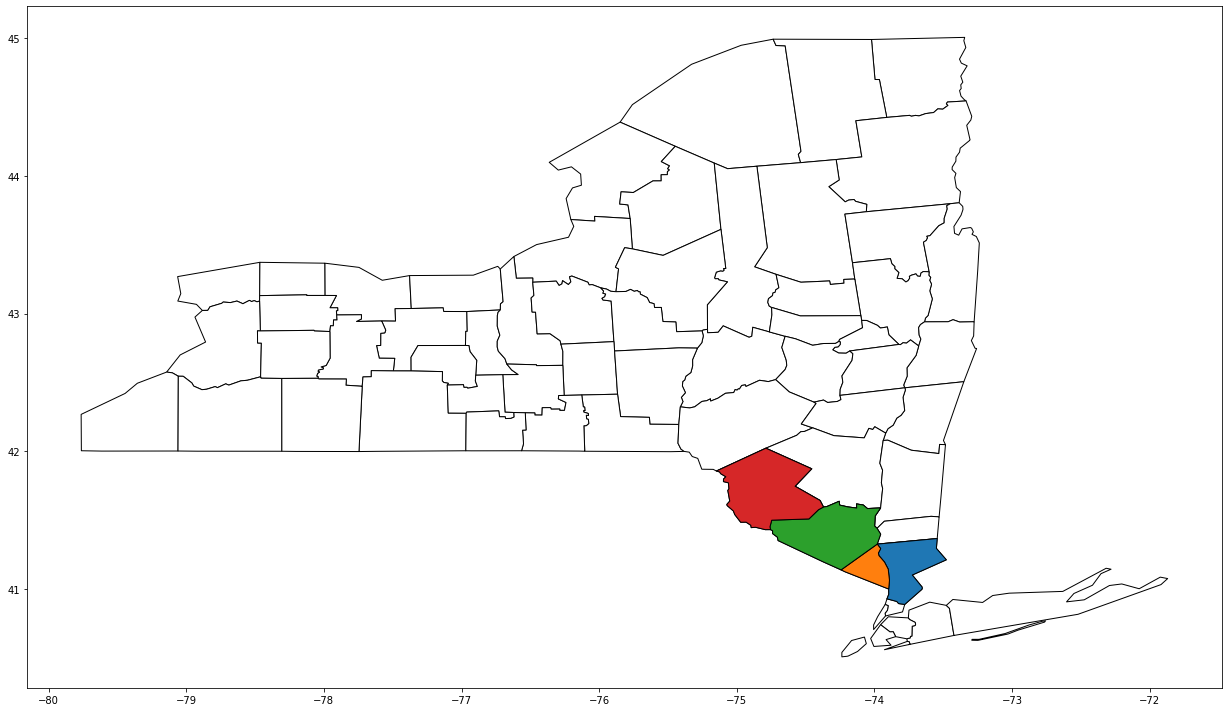

In [24]:
# Plot Spreading term (Diffusion)
plot_counties = [
    'New_York.Westchester',
    'New_York.Rockland',
    'New_York.Orange',
    'New_York.Sullivan',
]
df_plot_counties = pandas.DataFrame({'name' :plot_counties})
df_region_list = pandas.merge(df_plot_counties, df_region,on='name',how='left')

keys = df_region_list['pairs_id']
names = df_region_list['name'].values
names = [n.split('.')[-1] for n in names]

df_plot_logCases = df_LogCases[keys]
df_plot_logCases.plot(lw=4,figsize=(16,8))
plt.xlabel('', size=32)
plt.ylabel('Log daily new cases [$ln(c^j_n)$]', size=32)
td = timedelta(3)
plt.xticks(fontsize=32)
plt.yticks(fontsize=24)
plt.legend(names, fontsize=28)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_4C.svg'))
plt.show()

df_plot_diffusion = df_joined['Diffusion'][keys]
fig, ax = plt.subplots(figsize=(16,8))
df_plot_diffusion.plot(ax=ax, lw=4, legend=None)
ax_colors = [c.get_color() for c in ax.get_lines()]
plt.xlabel('', size=32)
plt.ylabel('Spreading term [$s$] (a.u.)', size=32)
td = timedelta(3)
plt.axhline(color='k')
plt.xticks(fontsize=32)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_4D.svg'))
plt.show()

df_plot = geopandas.GeoDataFrame(df_region_list, geometry='poly')
df_region_helper_NY = df_region_helper[df_region_helper['State']=='New_York']
fig, ax = plt.subplots(figsize=(20,10))
df_region_helper_NY.plot(ax=ax, facecolor="white", edgecolor="black", lw=1)
df_plot.plot(ax=ax, facecolor=ax_colors, edgecolor="black", lw=1)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_4D_Inset.svg'))
plt.show()

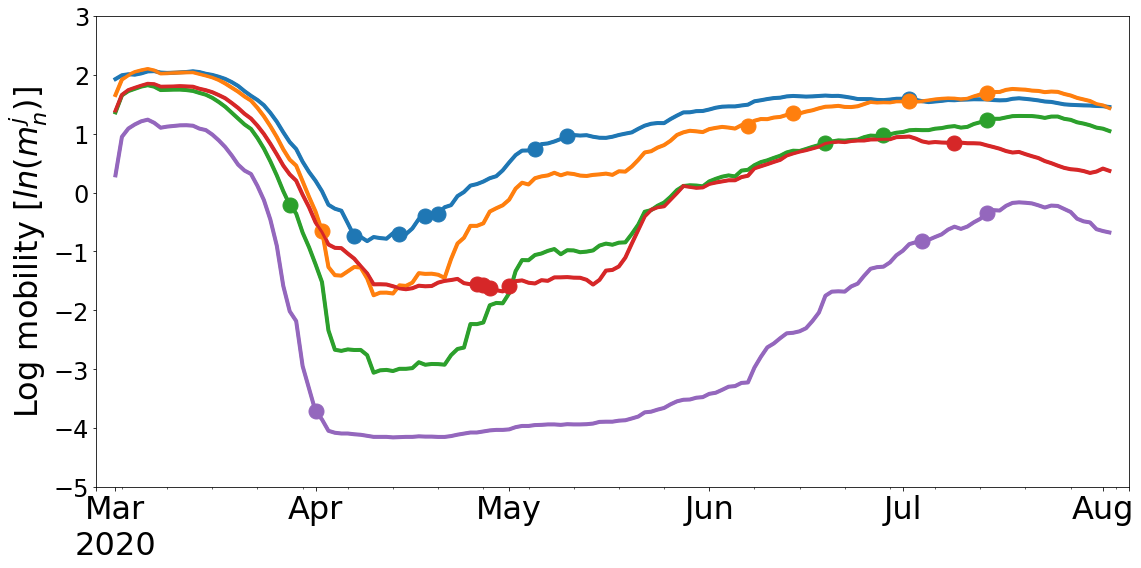

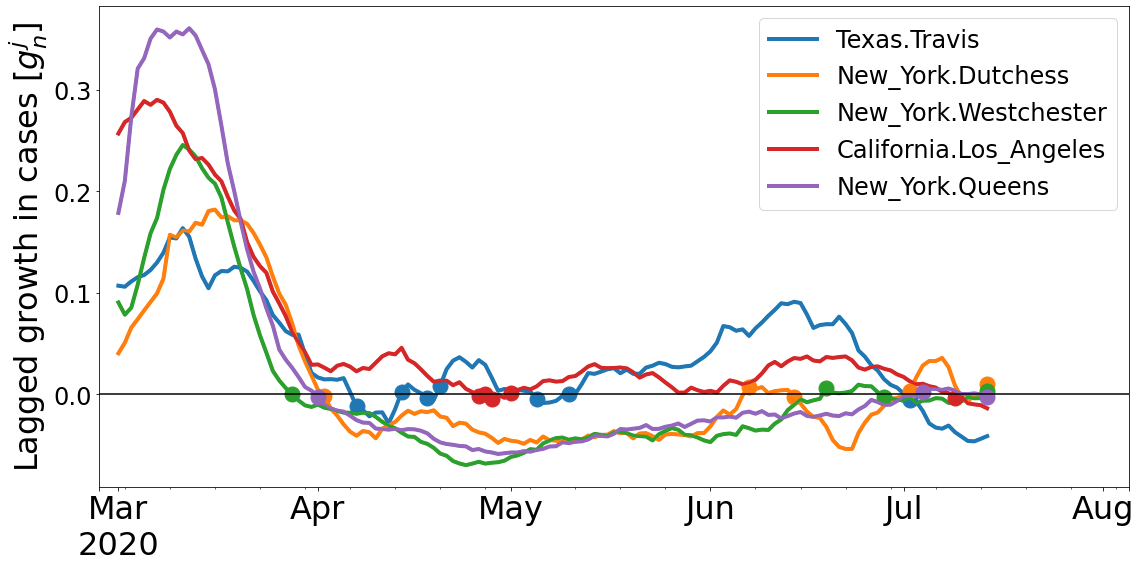

In [25]:
df_plot = df_lagged[lag_growthCases]
df_plot_filtered = df_lagged_filtered[lag_growthCases]

plot_counties = [
    'Texas.Travis',
    'New_York.Dutchess',
    'New_York.Westchester',
    'California.Los_Angeles',
    'New_York.Queens',
]
df_plot_counties = pandas.DataFrame({'name' :plot_counties})
df_region_list = pandas.merge(df_plot_counties, df_region,on='name',how='left')

keys = df_region_list['pairs_id']
names = df_region_list['name']


df_plot_growth = df_plot.swaplevel(axis=1)['subsequent_GrowthCases']
df_plot_growth = df_plot_growth[keys]

df_plot_filtered_growth = df_plot_filtered.swaplevel(axis=1)['subsequent_GrowthCases']
df_plot_filtered_growth = df_plot_filtered_growth[keys]


df_plot_logMobility = df_plot.swaplevel(axis=1)['LogMobility']
df_plot_logMobility = df_plot_logMobility[keys]

df_plot_filtered_logMobility = df_plot_filtered.swaplevel(axis=1)['LogMobility']
df_plot_filtered_logMobility = df_plot_filtered_logMobility[keys]

fig, ax = plt.subplots(figsize=(16,8))
df_plot_logMobility.plot(ax=ax, lw=4, legend=None)
plt.xticks(fontsize=32)
plt.yticks(fontsize=24)
ax_colors = [c.get_color() for c in ax.get_lines()]
for pairs_id, c in zip(keys, ax_colors):
    df_plot_logMobility[pairs_id].plot(lw=3, c=c)
    df_plot_filtered_logMobility[pairs_id].plot(marker='o', markersize=15, ls='None', c=c)
plt.xlabel('')
plt.ylabel('Log mobility [$ln(m^j_n)$]', size=32)
td = timedelta(3)
plt.xlim(xmin=df_plot.index[0]-td, xmax=df_plot.index[-1]+td)
plt.ylim(ymin=-5, ymax=3) #plt.ylim(ymin=-2.5, ymax=1.5)
plt.xticks(fontsize=32)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_2A.svg'))
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
df_plot_growth.plot(ax=ax, lw=4, legend=None)
plt.xticks(fontsize=32)
plt.yticks(fontsize=24)
ax_colors = [c.get_color() for c in ax.get_lines()]
for pairs_id, c in zip(keys, ax_colors):
    df_plot_growth[pairs_id].plot(lw=3, c=c)
    df_plot_filtered_growth[pairs_id].plot(marker='o', markersize=15, ls='None', c=c)
plt.xlabel('')
plt.ylabel('Lagged growth in cases $[g^j_n]$', size=32)
plt.xlim(xmin=df_plot.index[0]-td, xmax=df_plot.index[-1]+td)
plt.legend(names.values, fontsize=24)
plt.axhline(color='k')
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_2B.svg'))
plt.show()

/home/ipython/software/python/python37/virtualenvs/pairs-python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


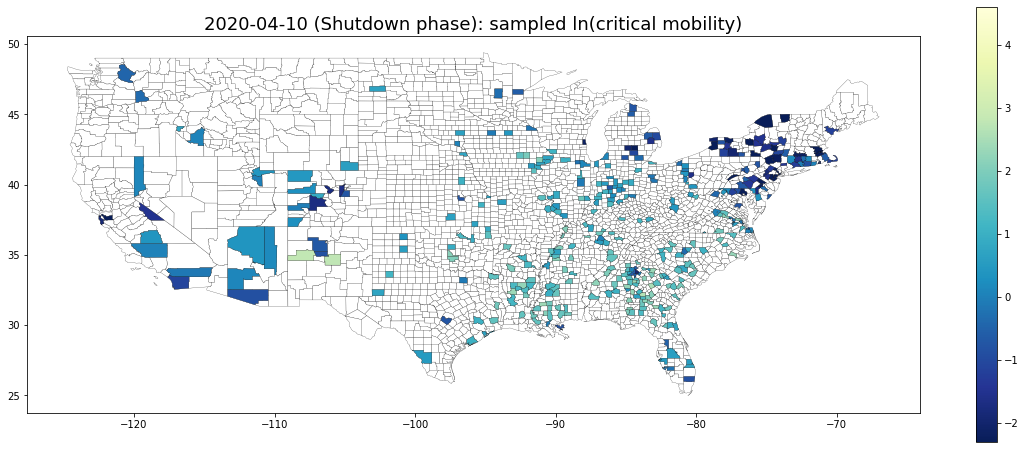

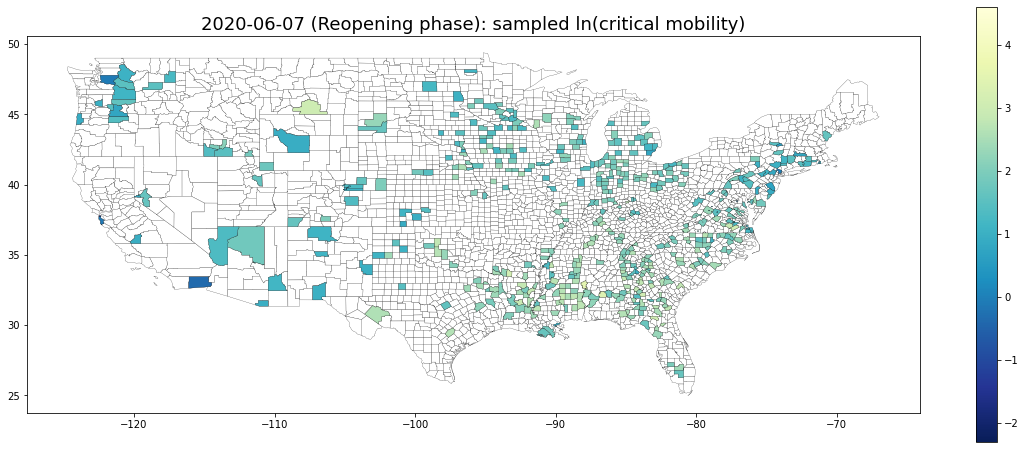

In [26]:
# Make an averaged (over the lag dimension) version of the sample data for plotting purposes
lag_list = numpy.arange(lag_growthCases-lag_growthCasesStd, lag_growthCases+lag_growthCasesStd+1)
numpy_data = numpy.nanmean([df_lagged_filtered[i].values for i in lag_list], axis=0)
df_lagged_filtered_averaged = pandas.DataFrame(data=numpy_data,
                                               columns=df_lagged_filtered[lag_growthCases].columns,
                                               index=df_lagged_filtered[lag_growthCases].index)

df_plot_LM = df_lagged_filtered_averaged.swaplevel(axis=1)['LogMobility']

dt1 = dt_shutdown

date = dt1.strftime('%Y-%m-%d')
df_plot = df_plot_LM.loc[dt1].dropna().reset_index()
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')
df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column=dt1, legend=True, edgecolor="black", lw=0.2, cmap='YlGnBu_r',
             vmin=-numpy.log(10), vmax=2*numpy.log(10))
plt.title(date + ' (Shutdown phase): sampled ln(critical mobility)', size=18)
plt.show()

dt1 = dt_reopening

date = dt1.strftime('%Y-%m-%d')
df_plot = df_plot_LM.loc[dt1].dropna().reset_index()
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')
df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column=dt1, legend=True, edgecolor="black", lw=0.2, cmap='YlGnBu_r',
             vmin=-numpy.log(10), vmax=2*numpy.log(10))
plt.title(date + ' (Reopening phase): sampled ln(critical mobility)', size=18) 
plt.show()

slope_scaled (growth factor)  0.016325807169380993
pct growth     3.830706035191067


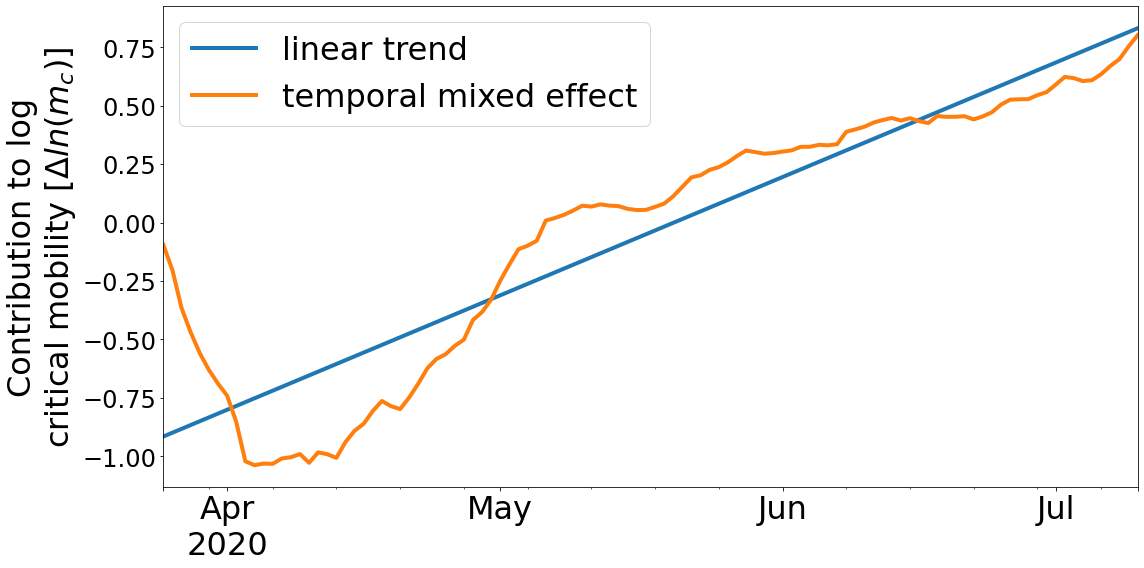

In [27]:
if 'day' in lmer1.fe_params:
    dt_day_start = datetime(2020,1,1, tzinfo=pytz.utc)
    
    df_plot = df_date_intercepts.copy()
    df_plot = df_plot.set_index('date')
    df_plot.index = [datetime.strptime(x, '%Y-%m-%d') for x in df_plot.index]
    df_plot['day'] = (df_plot.index - datetime(dt_day_start.year, dt_day_start.month, dt_day_start.day)).days
    xs = df_plot['day'].values
    
    # Fitting parameter
    slope_day = lmer1.fe_params['day'].values[0]
    
    # to reverse the standardscaler
    scale_day = scaler.scale_[scaling_columns.index('day')]
    mean_day = scaler.mean_[scaling_columns.index('day')]
    xs_scaled = (xs-mean_day)/scale_day
    
    slope_scaled = slope_day / scale_day
    print('slope_scaled (growth factor) ', slope_scaled)
    print('pct growth    ', 100*(10**slope_scaled-1))
    
    # Since we don't need the day column, just overwrite
    df_plot['day'] = slope_day * xs_scaled

    df_plot['temporal mixed effect'] = df_plot['day'] + df_plot['date Intercept']
    df_plot = df_plot.rename(columns={'day': 'linear trend'})
    
    df_plot[['linear trend', 'temporal mixed effect']].plot(lw=4, figsize=(16,8))
    plt.xticks(fontsize=32)
    plt.yticks(fontsize=24)
    plt.xlabel('', size=32)
    plt.ylabel('Contribution to log\ncritical mobility $[\Delta ln( m_c )]$', size=32)
    #plt.title('Critical Mobility Components: Temporal mixed effects', size=18)
    plt.legend(fontsize=32)
    plt.tight_layout()
    plt.savefig(os.path.join(data_subdirectory, 'fig_4A.svg'))
    plt.show()

/home/ipython/software/python/python37/virtualenvs/pairs-python3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ipython/software/python/python37/virtualenvs/pairs-python3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


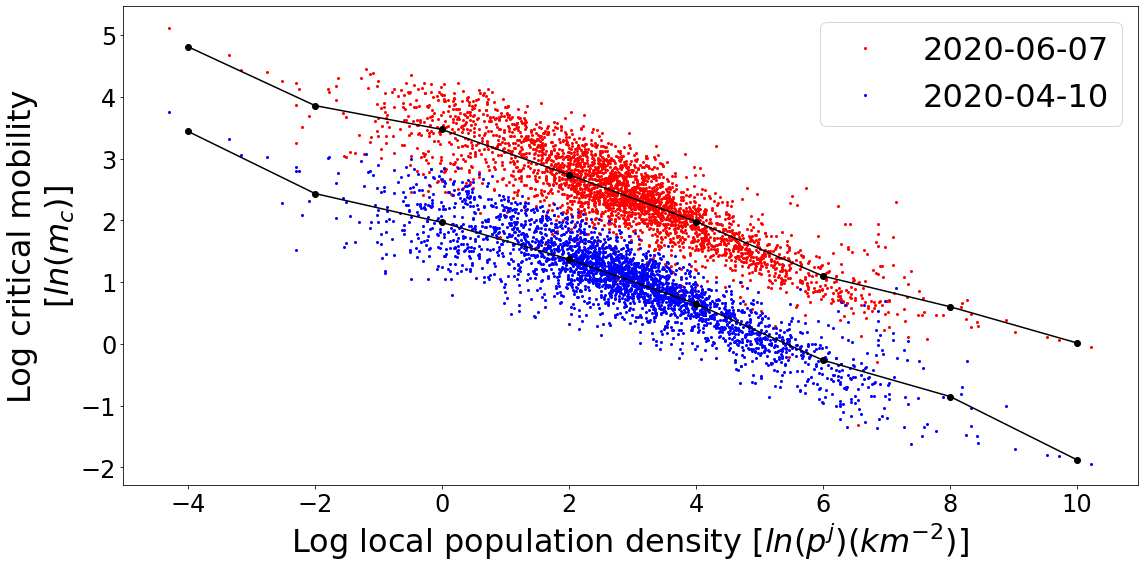

In [28]:
# Population density dependence of critical mobility
# Binning the fit
xmin=-4.
xmax=10.
dx = 2

dt1 = dt_shutdown
dt2 = dt_reopening
# In case the second timestamp does not exist yet chose the latest
dt2b = datetime(*datetime.strptime(last_date_with_intercept, '%Y-%m-%d').timetuple()[0:6], tzinfo=pytz.utc)
if dt2b<dt2:
    dt2=dt2b

df1 = df_preds[df_preds['timestamp']==dt1]
df2 = df_preds[df_preds['timestamp']==dt2]

# Binning the fit
xs = list(numpy.arange(xmin, xmax+dx, dx))
bins = list(numpy.arange(xmin-dx/2, xmax+3/2*dx, dx))
df1['bin'] = pandas.cut(df1['LogPopDensity'], bins)
df2['bin'] = pandas.cut(df2['LogPopDensity'], bins)

# Conditional means given the population by binning
df1_conditional_mean = df1.groupby('bin').mean()
df2_conditional_mean = df2.groupby('bin').mean()

# apply standard scaler
df1_conditional_mean[scaling_columns] = scaler.transform(df1_conditional_mean[scaling_columns])
df2_conditional_mean[scaling_columns] = scaler.transform(df2_conditional_mean[scaling_columns])

# Multipy with the fitting slope
fe_conditional_mean_1 = {}
fe_conditional_mean_2 = {}
for f in lmer1.fe_params.columns:
    if f not in ['(Intercept)', 'LogPopDensity', 'day']:
        fe_conditional_mean_1[f] = lmer1.fe_params[f]['Estimate'] * df1_conditional_mean[f]
        fe_conditional_mean_2[f] = lmer1.fe_params[f]['Estimate'] * df2_conditional_mean[f]
df1_fe_conditional_mean = pandas.DataFrame(fe_conditional_mean_1)
df2_fe_conditional_mean = pandas.DataFrame(fe_conditional_mean_2)
df1_fe_conditional_mean.sum(axis=1)


df1 = df1.set_index('LogPopDensity')
df2 = df2.set_index('LogPopDensity')

plt.figure(figsize=(16, 8))

df2['preds'].plot(marker='o', markersize=2, ls='None', c='red', label=dt2.date())
df1['preds'].plot(marker='o', markersize=2, ls='None', c='blue', label=dt1.date())

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.xlabel('Log local population density $[ln(p^j) (km^{-2})]$', size=32)
plt.ylabel('Log critical mobility\n$[ln(m_c)]$', size=32)

plt.legend(fontsize=32)

# Fitting parameter
overall_intercept = lmer1.fe_params['(Intercept)']['Estimate']
slope_day = lmer1.fe_params['day']['Estimate']
slope_LogPopDensity = lmer1.fe_params['LogPopDensity']['Estimate']

date1 = dt1.strftime('%Y-%m-%d')
date2 = dt2.strftime('%Y-%m-%d')

day1 = (dt1-datetime(2020,1,1, tzinfo=pytz.utc)).days
day2 = (dt2-datetime(2020,1,1, tzinfo=pytz.utc)).days

# Random intercept
df_date_intercepts = vars(lmer1)['re_params']['date'].reset_index(drop=True)
df_date_intercepts = df_date_intercepts.rename(columns={'(Intercept)': 'date Intercept'})

date1_intercept = df_date_intercepts[df_date_intercepts['date']==date1]['date Intercept'].values[0]
date2_intercept = df_date_intercepts[df_date_intercepts['date']==date2]['date Intercept'].values[0]

# to reverse the standardscaler
scale_day = scaler.scale_[scaling_columns.index('day')]
mean_day = scaler.mean_[scaling_columns.index('day')]
day1_scaled = (day1-mean_day)/scale_day
day1_intercept = day1_scaled * slope_day
day2_scaled = (day2-mean_day)/scale_day
day2_intercept = day2_scaled * slope_day

scale_LogPopDensity = scaler.scale_[scaling_columns.index('LogPopDensity')]
mean_LogPopDensity = scaler.mean_[scaling_columns.index('LogPopDensity')]
xs_scaled = (xs-mean_LogPopDensity)/scale_LogPopDensity

plt.plot(xs, overall_intercept + df1_fe_conditional_mean.sum(axis=1) + 
         date1_intercept + day1_intercept + slope_LogPopDensity * xs_scaled, c='black', marker='o')
plt.plot(xs, overall_intercept + df2_fe_conditional_mean.sum(axis=1) + 
         date2_intercept + day2_intercept + slope_LogPopDensity * xs_scaled, c='black', marker='o')

plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_4B.svg'))
plt.show()

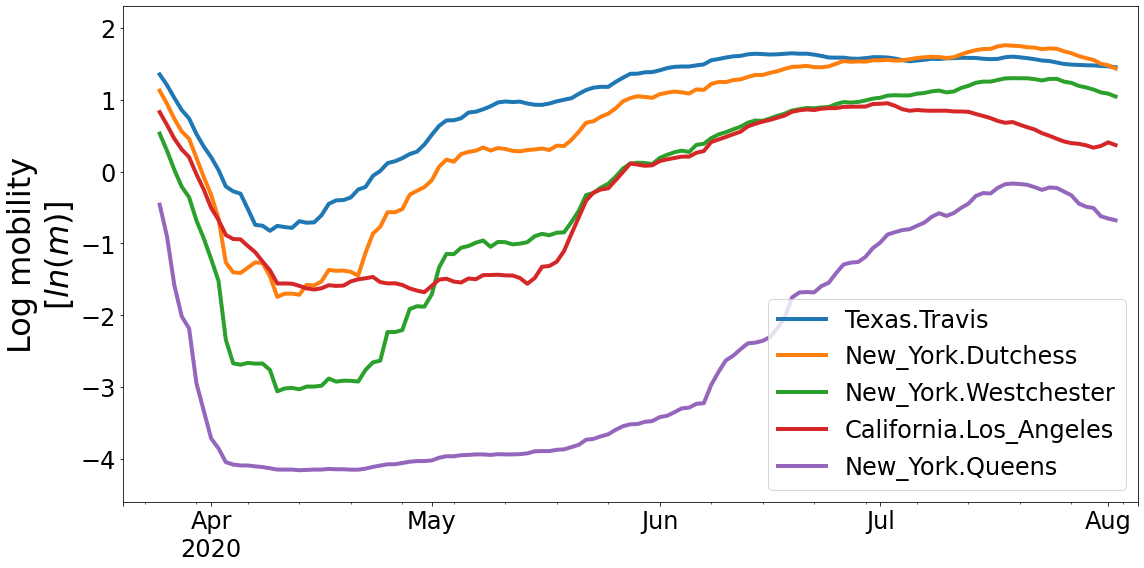

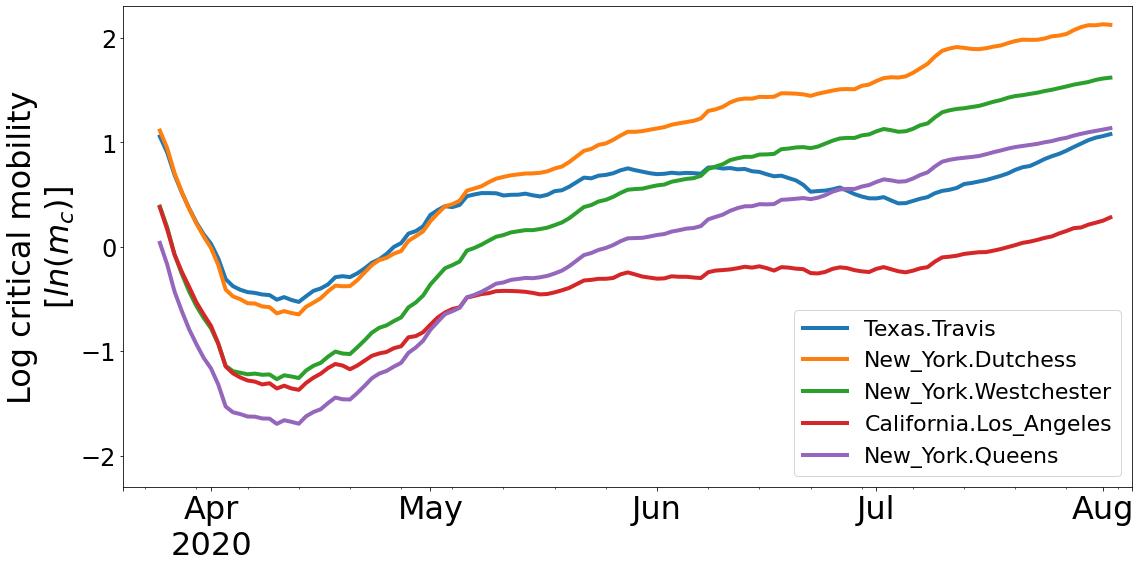

In [29]:
df1 = df_lagged_filtered[lag_growthCases].swaplevel(axis=1)['LogMobility']
df2 = df_preds[['pairs_id', 'timestamp', 'preds']].set_index(['timestamp', 'pairs_id']).unstack()['preds']
df3 = df_preds[['pairs_id', 'timestamp', 'LogMobility']].set_index(['timestamp', 'pairs_id']).unstack()['LogMobility']
df4 = df_preds[['pairs_id', 'timestamp', 'GrowthCases']].set_index(['timestamp', 'pairs_id']).unstack()['GrowthCases']

# Create the multiindex
df1.columns = pandas.MultiIndex.from_product([df1.columns, ['measured_logCM']])
df1.columns.names = ['pairs_id', None]
df2.columns = pandas.MultiIndex.from_product([df2.columns, ['modeled_logCM']])
df2.columns.names = ['pairs_id', None]
df3.columns = pandas.MultiIndex.from_product([df3.columns, ['LogMobility']])
df3.columns.names = ['pairs_id', None]
df4.columns = pandas.MultiIndex.from_product([df4.columns, ['GrowthCases']])
df4.columns.names = ['pairs_id', None]

df = df1.swaplevel(axis=1).join(df2.swaplevel(axis=1))
df = df.join(df3.swaplevel(axis=1))
df = df.join(df4.swaplevel(axis=1))
df = df.swaplevel(axis=1)
df.tail()

df_plot = df
df_plot_filtered = df

plot_counties = [
    'Texas.Travis',
    'New_York.Dutchess',
    'New_York.Westchester',
    'California.Los_Angeles',
    'New_York.Queens',
]
df_plot_counties = pandas.DataFrame({'name' :plot_counties})
df_region_list = pandas.merge(df_plot_counties, df_region,on='name',how='left')

keys = df_region_list['pairs_id']
names = df_region_list['name']


df_plot_model = df_plot.swaplevel(axis=1)['modeled_logCM']
df_plot_model = df_plot_model[keys]

df_plot_logMobility = df_plot.swaplevel(axis=1)['LogMobility']
df_plot_logMobility = df_plot_logMobility[keys]

plt.figure(figsize=(16,8))
for pairs_id in keys:
    df_plot_logMobility[pairs_id].plot(lw=4)
plt.xlabel('', size=32)
plt.ylabel('Log mobility\n$[ln(m)]$', size=32)
td = timedelta(3)
plt.xlim(xmin=datetime(2020,3,20), xmax=df_plot.index[-1]+td)
plt.ylim(ymin=-4.6, ymax=2.3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(names.values, fontsize=24)
plt.tight_layout()
#plt.savefig(os.path.join(data_subdirectory, 'XXX.svg'))
plt.show()

plt.figure(figsize=(16,8))
for pairs_id in keys:
    df_plot_model[pairs_id].plot(lw=4)
plt.xlabel('', size=18)
plt.ylabel('Log critical mobility\n$[ln(m_c)]$', size=32)
td = timedelta(3)
plt.xlim(xmin=datetime(2020,3,20), xmax=df_plot.index[-1]+td)
plt.ylim(ymin=-2.3, ymax=2.3)
plt.xticks(fontsize=32)
plt.yticks(fontsize=24)
plt.legend(names.values, fontsize=22)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_3C.svg'))
plt.show()

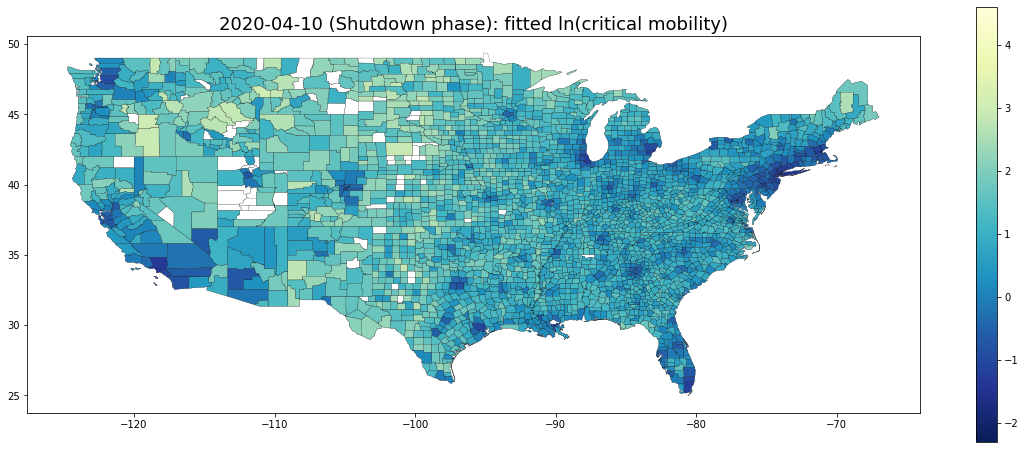

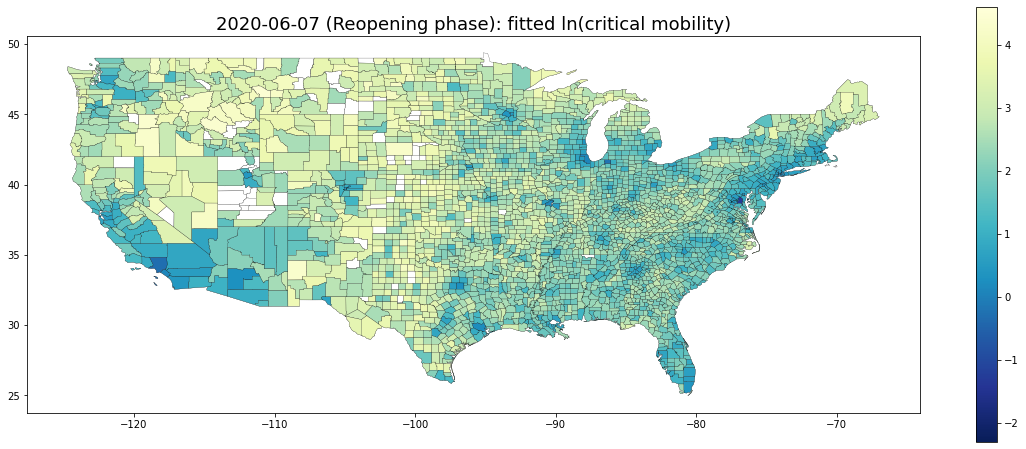

In [30]:
# Plot critical mobility maps

dt1 = dt_shutdown

date = dt1.strftime('%Y-%m-%d')
df_plot = df_preds[df_preds['date']==date][['pairs_id', 'preds']].dropna().reset_index()
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')
df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column='preds', legend=True, edgecolor="black", lw=0.2, cmap='YlGnBu_r',
             vmin=-numpy.log(10), vmax=2*numpy.log(10))
plt.title(date + ' (Shutdown phase): fitted ln(critical mobility)', size=18)
plt.savefig(os.path.join(data_subdirectory, 'fig_3A.svg'))
plt.show()

dt1 = dt_reopening

date = dt1.strftime('%Y-%m-%d')
df_plot = df_preds[df_preds['date']==date][['pairs_id', 'preds']].dropna().reset_index()
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')
df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column='preds', legend=True, edgecolor="black", lw=0.2, cmap='YlGnBu_r',
             vmin=-numpy.log(10), vmax=2*numpy.log(10))
plt.title(date + ' (Reopening phase): fitted ln(critical mobility)', size=18)
plt.savefig(os.path.join(data_subdirectory, 'fig_3B.svg'))
plt.show()

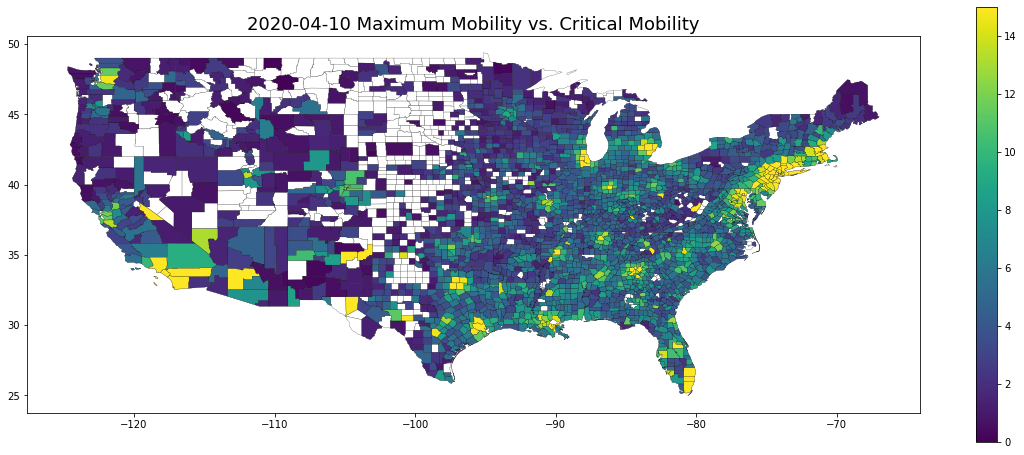

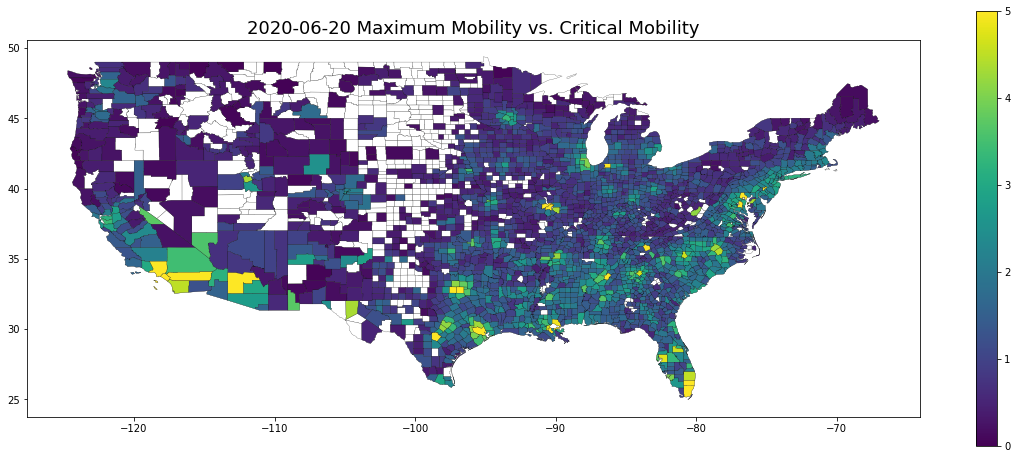

In [31]:
# Max Mobility vs. Critical Mobility Maps

date='2020-04-10'
df = df_preds[df_preds['date']==date][['pairs_id', 'preds', 'MaxMobility']]
df['ReducedMobility'] = (df['MaxMobility']/numpy.exp(df['preds']))
df_plot = df.dropna().reset_index()
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')
df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column='ReducedMobility', legend=True, edgecolor="black", cmap='viridis', vmin=0, vmax=15, lw=0.2)
plt.title(date + ' Maximum Mobility vs. Critical Mobility', size=18)
plt.savefig(os.path.join(data_subdirectory, 'fig_5A.svg'))
plt.show()

date='2020-06-20'
df = df_preds[df_preds['date']==date][['pairs_id', 'preds', 'MaxMobility']]
df['ReducedMobility'] = (df['MaxMobility']/numpy.exp(df['preds']))
df_plot = df.dropna().reset_index()
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')
df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column='ReducedMobility', legend=True, edgecolor="black", cmap='viridis', vmin=0, vmax=5, lw=0.2)
plt.title(date + ' Maximum Mobility vs. Critical Mobility', size=18)
plt.savefig(os.path.join(data_subdirectory, 'fig_5B.svg'))
plt.show()

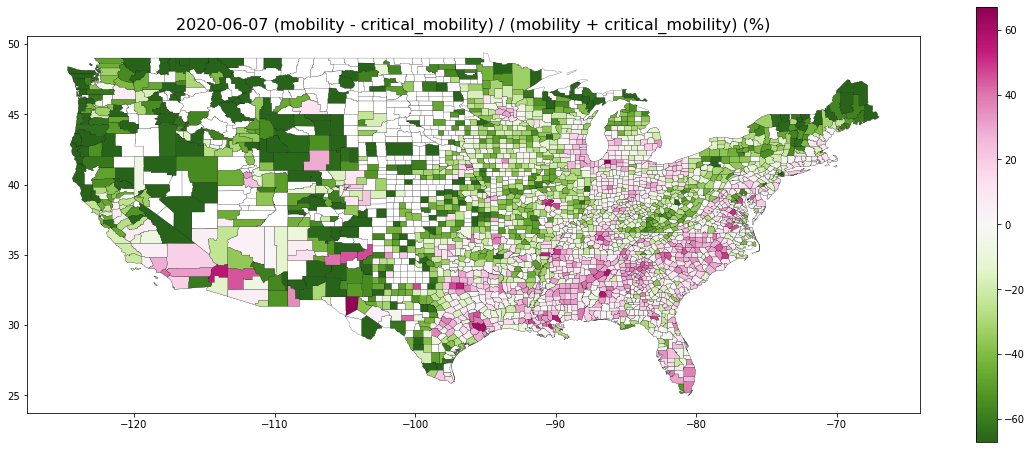

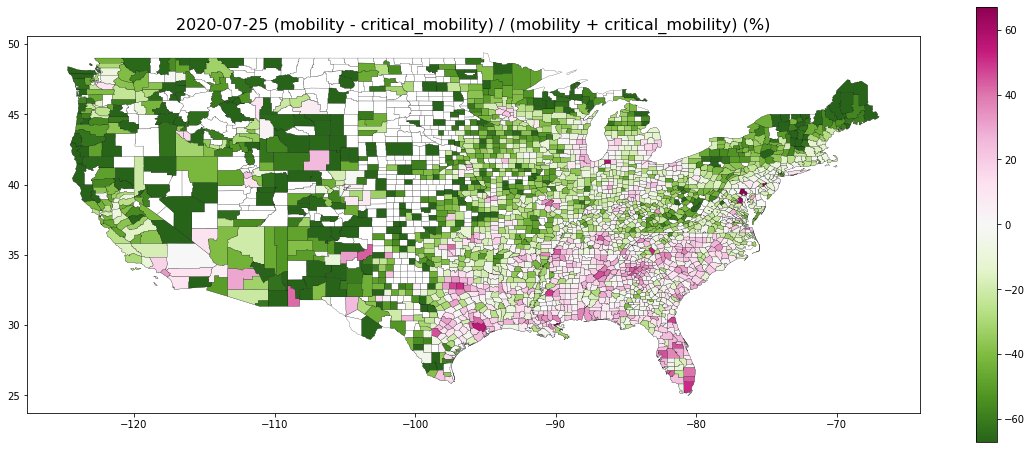

In [32]:
# Plot NDMI Map
dt1 = dt_reopening

date = dt1.strftime('%Y-%m-%d')
df_plot = df_preds[df_preds['date']==date][['pairs_id', 'preds']].dropna().reset_index()
df_plot['preds'] = numpy.exp(df_plot['preds'])
df_tmp_mobility = df_Mobility.T[dt1].rename('Mobility').dropna().reset_index()
df_plot = pandas.merge(df_plot, df_tmp_mobility, on='pairs_id', how='left').dropna().reset_index()
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')

df_plot['Value'] = 100 * (df_plot['Mobility'] - df_plot['preds']) / (df_plot['Mobility'] + df_plot['preds'])

df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column='Value', legend=True, edgecolor="black", lw=0.2,  cmap='PiYG_r', vmin=-67, vmax=67)
plt.title(date + ' (mobility - critical_mobility) / (mobility + critical_mobility) (%)', size=16)
plt.show()

try:
    dt1 = dt_cutoff_training_COVID

    date = dt1.strftime('%Y-%m-%d')
    df_plot = df_preds[df_preds['date']==date][['pairs_id', 'preds']].dropna().reset_index()
    df_plot['preds'] = numpy.exp(df_plot['preds'])
    df_tmp_mobility = df_Mobility.T[dt1].rename('Mobility').dropna().reset_index()
    df_plot = pandas.merge(df_plot, df_tmp_mobility, on='pairs_id', how='left').dropna().reset_index()
    df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')

    df_plot['Value'] = 100 * (df_plot['Mobility'] - df_plot['preds']) / (df_plot['Mobility'] + df_plot['preds'])

    df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
    fig, ax = plt.subplots(figsize=(20,8))
    df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
    df_plot.plot(ax=ax, column='Value', legend=True, edgecolor="black", lw=0.2,  cmap='PiYG_r', vmin=-67, vmax=67)
    plt.title(date + ' (mobility - critical_mobility) / (mobility + critical_mobility) (%)', size=16)
    plt.savefig(os.path.join(data_subdirectory, 'fig_5D.svg'))
    plt.show()
except:
    pass 


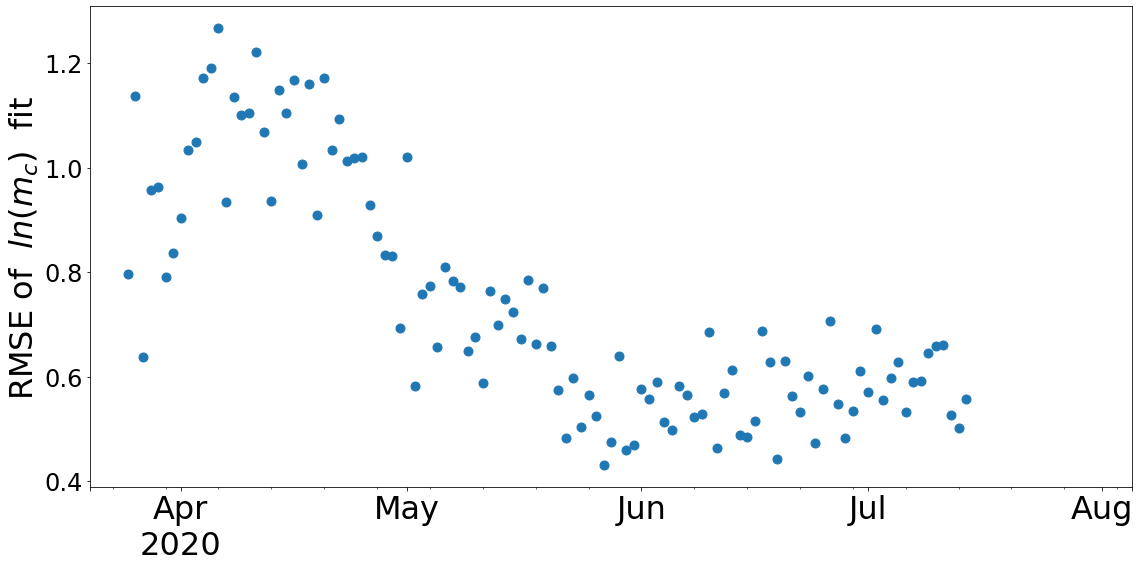

In [33]:
def grouped_rmse(row):
    return numpy.sqrt(numpy.nanmean((row[0] - row[1])**2))

df = df_preds.dropna(subset=['preds', 'LogCriticalMobility']).reset_index(drop=True)

df_mean = df_preds[['timestamp', 'preds']].groupby('timestamp').mean()

df_count = df_preds[['timestamp', 'preds']].groupby('timestamp').count().rename(columns={'preds':'n'})

df_rmse = df.groupby('timestamp').apply(lambda x: grouped_rmse(x[['preds', 'LogCriticalMobility']].values.T))
df_rmse.name = 'rmse'
df_rmse = pandas.DataFrame(df_rmse)

df_mean_rmse = df_mean.join(df_rmse).join(df_count)
df_mean_rmse = df_mean_rmse.dropna()

plt.figure(figsize=(16, 8))
df_mean_rmse['rmse'].plot(lw=0, marker='o', markersize=9, fontsize=18)
plt.xlabel('')
plt.ylabel(r'RMSE of  $ln(m_c)$  fit', size=32)
td = timedelta(3)
plt.xlim(xmin=datetime(2020,3,20), xmax=dt_cutoff_latest+td)
plt.xticks(fontsize=32)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_3D.svg'))
plt.show()

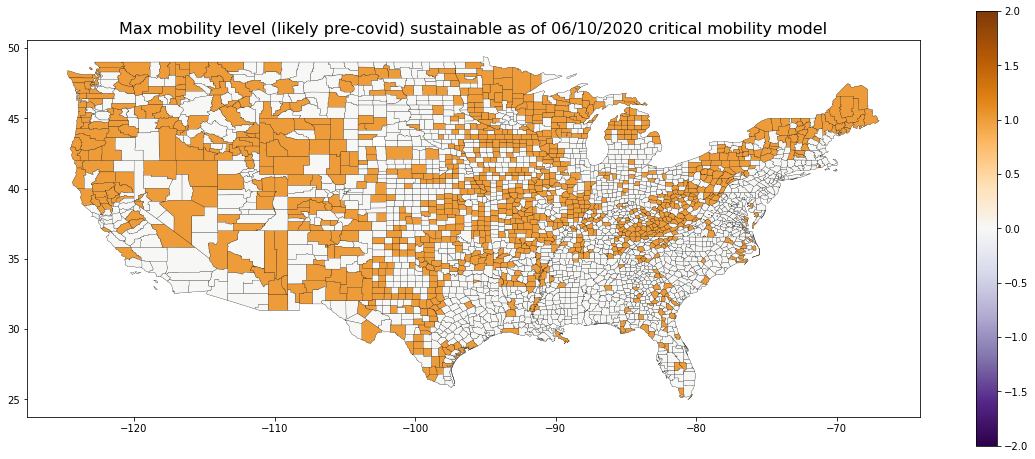

In [34]:
# Find counties that are already sustainable
dt1 = datetime(2020,6,10, tzinfo=pytz.utc)

# Instead of pre-COVID mobility get the maximum mobililty up to the analysis date
s_logMobilityMax = numpy.log(df_joined['MaxMobility']).iloc[0]
s_logMobilityMax.name = 'logMobilityMax'

df = pandas.merge(df_preds, s_logMobilityMax.reset_index(), on='pairs_id', how='left')

df_plot = df[df['timestamp']==dt1].reset_index(drop=True)
df_plot['diff'] = (df_plot['logMobilityMax'] - df_plot['preds']) < 0
df_plot = pandas.merge(df_plot, df_region_helper[['pairs_id', 'poly']], on='pairs_id')

df_plot = geopandas.GeoDataFrame(df_plot, geometry='poly')
fig, ax = plt.subplots(figsize=(20,8))
df_region_helper.plot(ax=ax, facecolor="white", edgecolor="black", lw=0.2)
df_plot.plot(ax=ax, column='diff', legend=True, edgecolor="black", lw=0.2, cmap='PuOr_r', vmin=-2, vmax=2)
plt.title('Max mobility level (likely pre-covid) sustainable as of ' + dt1.strftime("%m/%d/%Y") + ' critical mobility model', size=16)
plt.savefig(os.path.join(data_subdirectory, 'fig_5C.svg'))
plt.show()

In [ ]:
# Predicitve power analysis

MIN_CASES = 10
MIN_CASES_CAPITA = 0
lag_analysis_start = 14  # Dont use the first couple of days for testing since mobility has no effect yet
lag_analysis_end = 42

# Date of testing (NDMI is used from this date)
dt_analysis_testing = dt_cutoff_training_COVID

dt_analysis_covid_start = dt_analysis_testing + timedelta(lag_analysis_start)
dt_analysis_covid_end = dt_analysis_testing + timedelta(lag_analysis_end)
print('Mobility data considered from', dt_analysis_testing, ' to ', dt_analysis_testing)
print('COVID-19 data considered from', dt_analysis_covid_start, ' to ', dt_analysis_covid_end)
print('lag_analysis_start', lag_analysis_start)
print('lag_analysis_end', lag_analysis_end)

df = df_NDMI.loc[dt_analysis_testing.strftime('%Y-%m-%d')].unstack().T
print('Original number counties ', len(df))
df = df[df['Cases']>=MIN_CASES]
df = df[df['CasesCapita']>=MIN_CASES_CAPITA]
print('Filtered number counties ',len(df))

filtered_pairs_ids = sorted(list(df.index.values))
df_NDMI_filtered=df_NDMI.swaplevel(axis=1)[filtered_pairs_ids].swaplevel(axis=1)

df_analysis_cases = df_LogCases.apply(lambda x: numpy.exp(x))

df_analysis_cases.index = [x.strftime('%Y-%m-%d') for x in df_analysis_cases.index]
df_analysis_cases.index.name = 'date'

# n day changes in cases
df_analysis_cases_shift_start = df_analysis_cases.shift(periods=-lag_analysis_start)
df_analysis_cases_shift_end = df_analysis_cases.shift(periods=-lag_analysis_end)

# Growth Rate
df_day_n_growth = numpy.log(df_analysis_cases_shift_end) - numpy.log(df_analysis_cases_shift_start)

In [ ]:
# COUNTY LEVEL TESTING

# Cutoff for NDMI
c=20
# Cutoff for growth in cases
k=0

print('Number days averaged     ', lag_analysis_end-lag_analysis_start)
print('Minimum number of new cases per 100 capita ', MIN_CASES_CAPITA)
print('Minimum number of new cases per county     ', MIN_CASES)
print('Cutoff Date              ', dt_analysis_testing)
print('Cutoff NDMI              ', c)
print('Cutoff COVID growth      ', k)

label_string = '$[ln(c^j_{n+42}) - ln(c^j_{n+14})]$'

# Create the multiindex
df_lag_analysis = df_day_n_growth.copy()
df_lag_analysis.columns = pandas.MultiIndex.from_product([df_lag_analysis.columns, ['SubsequentGrowthCases']])
df_lag_analysis.columns.names = ['pairs_id', None]
df_lag_analysis = df_lag_analysis.swaplevel(axis=1)


df_NDMI_analysis = df_NDMI_filtered[['NDMI']]

df_NDMI_analysis = pandas.merge(df_NDMI_analysis, df_lag_analysis, left_index=True, right_index=True)
df_NDMI_analysis = df_NDMI_analysis.swaplevel(axis=1)

df_analysis_testing = df_NDMI_analysis.loc[dt_analysis_testing.strftime('%Y-%m-%d')].unstack()
df_analysis_testing = df_analysis_testing.dropna(subset=['NDMI', 'SubsequentGrowthCases'])
print('Filtered number counties ',len(df_analysis_testing))

plt.figure(figsize=(14,11))
plt.scatter(df_analysis_testing['NDMI'], df_analysis_testing['SubsequentGrowthCases'], s=9, c='red')
# Plot some bands where we think we are confident
plt.axvline(c, color='k', lw=1)
plt.axvline(-c, color='k', lw=1)
plt.axhline(k, color='k', lw=1)
plt.axhline(-k, color='k', lw=1)

#plt.ylim(ymin=-.2, ymax=.2)
plt.xlabel('NDMI (%)', size=32)
plt.ylabel(str(lag_analysis_end-lag_analysis_start) + ' days growth in cases \n' + label_string, size=32)
plt.axhline(color='k', lw=1)
plt.axvline(color='k', lw=1)
plt.title(str(dt_analysis_testing.date()) + '\n', size=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_6A.svg'))
plt.show()

# True positives
df_tp = df_analysis_testing[(df_analysis_testing['NDMI']>c) & 
                            (df_analysis_testing['SubsequentGrowthCases']>k)]
tp = float(len(df_tp))

# True negatives
df_tn = df_analysis_testing[(df_analysis_testing['NDMI']<-c) & 
                            (df_analysis_testing['SubsequentGrowthCases']<-k)]
tn = float(len(df_tn))

# False positives
df_fp = df_analysis_testing[(df_analysis_testing['NDMI']>c) & 
                            (df_analysis_testing['SubsequentGrowthCases']<-k)]
fp = float(len(df_fp))

# False negatives
df_fn = df_analysis_testing[(df_analysis_testing['NDMI']<-c) & 
                            (df_analysis_testing['SubsequentGrowthCases']>k)]
fn = float(len(df_fn))

conf = numpy.array(((tp,fp), (fn,tn)))
print('Confusion Matrix')
print(conf)

# Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
# F1 score
f1 = 2*tp/(2*tp+fp+fn)

print('Total population ', tp+tn+fp+fn)
print('Accuracy         ', acc)
print('F1 Score         ', f1)

df_analysis_testing['NDMI classes'] = 0
df_analysis_testing.loc[df_analysis_testing['NDMI']>c, 'NDMI classes'] = 1
df_analysis_testing.loc[df_analysis_testing['NDMI']<-c, 'NDMI classes'] = -1
df_analysis_testing['subsequent growth classes'] = 0
df_analysis_testing.loc[df_analysis_testing['SubsequentGrowthCases']>k, 'subsequent growth classes'] = 1
df_analysis_testing.loc[df_analysis_testing['SubsequentGrowthCases']<-k, 'subsequent growth classes'] = -1

df = df_analysis_testing[['NDMI classes', 'SubsequentGrowthCases']]

x = df[df['NDMI classes']==-1]['SubsequentGrowthCases'].values
y = df[df['NDMI classes']==0]['SubsequentGrowthCases'].values
z = df[df['NDMI classes']==1]['SubsequentGrowthCases'].values
bins = numpy.linspace(-3,3,20)

plt.figure(figsize=(16, 12))
plt.hist([x, z], bins, density=True, color=['green','magenta'],
         label=['NDMI<' + str(c) + '%', 'NDMI>' + str(c) + '%'])
plt.legend(loc='upper right', fontsize=24)
plt.xlabel(str(lag_analysis_end-lag_analysis_start) + ' days growth in cases ' + label_string, size=32)
plt.axvline(color='k', lw=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig(os.path.join(data_subdirectory, 'fig_6B.svg'))
plt.show()